In [6]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
from datetime import datetime
import math
import os
from sklearn import preprocessing
import sys
from multiprocessing import Process, Pipe
from multiprocessing.pool import ThreadPool
import json
from scipy.ndimage.filters import gaussian_filter

###------------------- keras and tensorflow imports for the dataset and neural network --------------------##
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model, clone_model
from tensorflow.keras.layers import Dense, Dropout, Activation, LayerNormalization
from keras.utils import np_utils
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1



In [2]:
## Preprocessing of data
# Load data from keras:

(X_train_raw, y_train), (X_test_raw, y_test) = mnist.load_data()


# Reshape data for building the input vector from the 28x28 pixels

X_train = X_train_raw.reshape(60000, 784)
X_test = X_test_raw.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10 #complete
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)


In [3]:
## -------------------Deep Nural Network (DNN) -------------------------------------------
#----- Part (a) --------------------------------------------------------------------------

# Building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(100, input_shape=(784,), kernel_regularizer=l2(0.01)))
model.add(Activation('relu'))    

model.add(Dense(10))
model.add(Activation('softmax'))

In [4]:
## Question 1
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) 
    model_q1 = clone_model(model)
    model_q1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    ## Saving metrics in history

    # Complete the history: 
    history = model_q1.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()



print("Time elapsed: ", str(end-start), " s.")


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 1.2255 - accuracy: 0.8802 - val_loss: 0.5784 - val_accuracy: 0.9163
Epoch 2/50
60000/60000 - 1s - loss: 0.4671 - accuracy: 0.9216 - val_loss: 0.3847 - val_accuracy: 0.9320
Epoch 3/50
60000/60000 - 1s - loss: 0.3727 - accuracy: 0.9299 - val_loss: 0.3442 - val_accuracy: 0.9363
Epoch 4/50
60000/60000 - 1s - loss: 0.3440 - accuracy: 0.9363 - val_loss: 0.3158 - val_accuracy: 0.9412
Epoch 5/50
60000/60000 - 1s - loss: 0.3261 - accuracy: 0.9395 - val_loss: 0.3119 - val_accuracy: 0.9404
Epoch 6/50
60000/60000 - 1s - loss: 0.3135 - accuracy: 0.9419 - val_loss: 0.2955 - val_accuracy: 0.9454
Epoch 7/50
60000/60000 - 1s - loss: 0.3016 - accuracy: 0.9452 - val_loss: 0.2883 - val_accuracy: 0.9508
Epoch 8/50
60000/60000 - 1s - loss: 0.2927 - accuracy: 0.9464 - val_loss: 0.2793 - val_accuracy: 0.9535
Epoch 9/50
60000/60000 - 1s - loss: 0.2863 - accuracy: 0.9481 - val_loss: 0.2746 - val_accuracy: 0.9501
Epoch 10/50
60

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


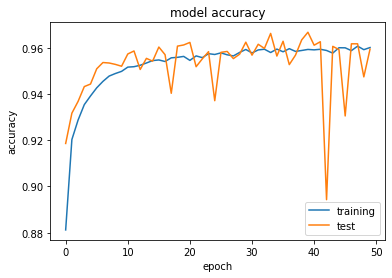

In [7]:
# Plot Question 1
# plotting the metrics
print(history.history.keys())

fig = plt.figure()

# ----------------------- Plot your result here ---------------------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'test'], loc='best')
plt.show()
#Plot here
#--------------------------------------------------------------------


9563  classified correctly
437  classified incorrectly


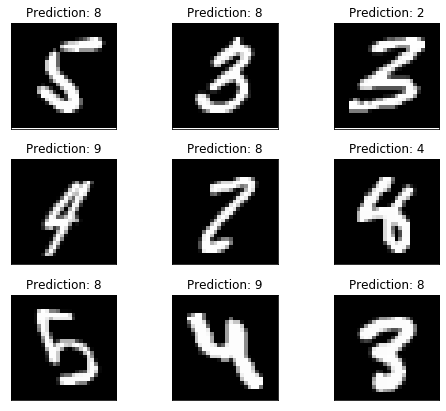

<Figure size 504x432 with 0 Axes>

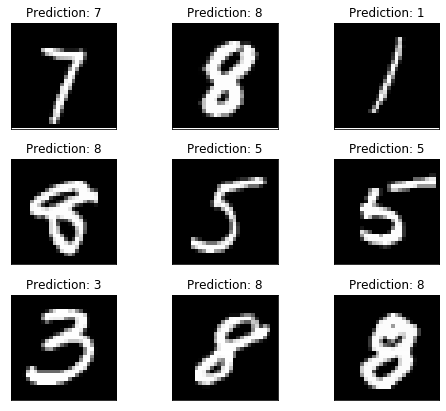

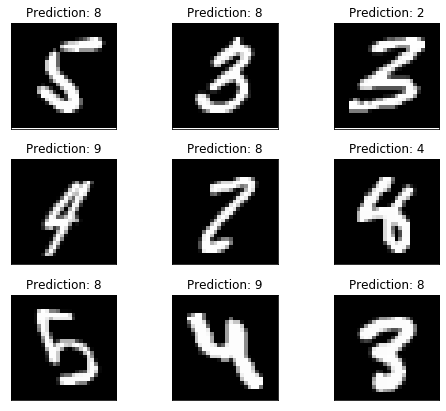

In [6]:
# ------------------------- Load the model and create predictions on the test set --------------------
mnist_model = load_model(load_model_path)
predicted_classes_raw = mnist_model.predict_classes(X_test)

## --------- See which we predicted correctly and which not-----------
predicted_classes = np_utils.to_categorical(predicted_classes_raw, n_classes)

diff = Y_test-predicted_classes

diffmax = np.amax(diff, axis=1)

correct_indices = []
incorrect_indices = []

for i in range(len(diffmax)):
    if diffmax[i] == 0:
        correct_indices.append(i)
    else:
        incorrect_indices.append(i)

print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# Adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,6)

figure_evaluation = plt.figure()
####----------------------------------------- Plot the results----------------
# plot 9 correct predictions
random_correct = np.int_(len(correct_indices)*np.random.rand(9,1))
fig = plt.figure()
for i in range(9):
    correct_index = correct_indices[int(random_correct[i])]
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test_raw[correct_index], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(predicted_classes_raw[correct_index]))
    plt.xticks([])
    plt.yticks([])
fig
# plot 9 incorrect predictions
random_incorrect = np.int_(len(incorrect_indices)*np.random.rand(9,1))
fig = plt.figure()
for i in range(9):
    incorrect_index = incorrect_indices[int(random_incorrect[i])]
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_test_raw[incorrect_index], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(predicted_classes_raw[incorrect_index]))
    plt.xticks([])
    plt.yticks([])
fig

In [12]:
#Question 2 - Diminishing Learning Rate
save_dir = ".\model" # Complete
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd_diminishing = optimizers.SGD(lr=0.1 , decay=0.1 , momentum= 0 , nesterov= False ) # complete the command  
    model_q2 = clone_model(model)
    model_q2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd) # complete the command  



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    ## Saving metrics in history

    # Complete the history: 
    history_dim = model_q2.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()


print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 1.2275 - accuracy: 0.8805 - val_loss: 0.5741 - val_accuracy: 0.9194
Epoch 2/50
60000/60000 - 3s - loss: 0.4639 - accuracy: 0.9219 - val_loss: 0.3821 - val_accuracy: 0.9309
Epoch 3/50
60000/60000 - 3s - loss: 0.3737 - accuracy: 0.9292 - val_loss: 0.3582 - val_accuracy: 0.9312
Epoch 4/50
60000/60000 - 3s - loss: 0.3438 - accuracy: 0.9346 - val_loss: 0.3247 - val_accuracy: 0.9375
Epoch 5/50
60000/60000 - 3s - loss: 0.3258 - accuracy: 0.9399 - val_loss: 0.3005 - val_accuracy: 0.9461
Epoch 6/50
60000/60000 - 3s - loss: 0.3117 - accuracy: 0.9433 - val_loss: 0.2981 - val_accuracy: 0.9461
Epoch 7/50
60000/60000 - 3s - loss: 0.3013 - accuracy: 0.9460 - val_loss: 0.2795 - val_accuracy: 0.9500
Epoch 8/50
60000/60000 - 3s - loss: 0.2936 - accuracy: 0.9468 - val_loss: 0.2887 - val_accuracy: 0.9465
Epoch 9/50
60000/60000 - 2s - loss: 0.2854 - accuracy: 0.9478 - val_loss: 0.2934 - val_accuracy: 0.9415
Epoch 10/50
60

In [14]:
#Question 2 - Adagrad Learning Rate
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    ada = optimizers.Adagrad(lr=0.01, epsilon=1e-08, decay=0.0)
    model_q2_ada = clone_model(model)
    model_q2_ada.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=ada) 

    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    ## Saving metrics in history

    # Complete the history: 
    history_ada = model_q2_ada.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()




print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 1.9956 - accuracy: 0.8316 - val_loss: 1.3371 - val_accuracy: 0.8999
Epoch 2/50
60000/60000 - 2s - loss: 1.0827 - accuracy: 0.9018 - val_loss: 0.8545 - val_accuracy: 0.9131
Epoch 3/50
60000/60000 - 2s - loss: 0.7419 - accuracy: 0.9115 - val_loss: 0.6260 - val_accuracy: 0.9187
Epoch 4/50
60000/60000 - 2s - loss: 0.5750 - accuracy: 0.9169 - val_loss: 0.5108 - val_accuracy: 0.9234
Epoch 5/50
60000/60000 - 2s - loss: 0.4887 - accuracy: 0.9217 - val_loss: 0.4488 - val_accuracy: 0.9264
Epoch 6/50
60000/60000 - 2s - loss: 0.4416 - accuracy: 0.9237 - val_loss: 0.4141 - val_accuracy: 0.9276
Epoch 7/50
60000/60000 - 2s - loss: 0.4133 - accuracy: 0.9266 - val_loss: 0.3937 - val_accuracy: 0.9297
Epoch 8/50
60000/60000 - 2s - loss: 0.3951 - accuracy: 0.9285 - val_loss: 0.3787 - val_accuracy: 0.9305
Epoch 9/50
60000/60000 - 2s - loss: 0.3821 - accuracy: 0.9309 - val_loss: 0.3696 - val_accuracy: 0.9328
Epoch 10/50
60

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


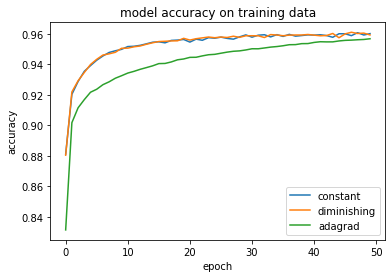

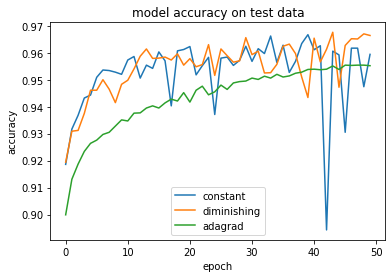

In [15]:
#Question 2 - plot
# plotting the metrics
print(history.history.keys())

fig = plt.figure()
# ----------------------- Plot your result here ---------------------
plt.plot(history.history['accuracy'])
plt.plot(history_dim.history['accuracy'])
plt.plot(history_ada.history['accuracy'])
plt.title('model accuracy on training data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['constant', 'diminishing', 'adagrad'], loc='best')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history_dim.history['val_accuracy'])
plt.plot(history_ada.history['val_accuracy'])
plt.title('model accuracy on test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['constant', 'diminishing', 'adagrad'], loc='best')
plt.show()
#Plot here
#--------------------------------------------------------------------

In [16]:
#Question 3 model 2
model2 = Sequential()
model2.add(Dense(50, input_shape=(784,), kernel_regularizer=l2(0.01)))
model2.add(Activation('relu'))    

model2.add(Dense(50, kernel_regularizer=l2(0.01)))
model2.add(Activation('relu'))

model2.add(Dense(10))
model2.add(Activation('softmax'))
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) # complete the command  
    model_q3 = clone_model(model2)
    model_q3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd) # complete the command  



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    # Complete the history: 
    history3 = model_q3.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()

print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 1.2089 - accuracy: 0.8606 - val_loss: 0.6759 - val_accuracy: 0.9023
Epoch 2/50
60000/60000 - 2s - loss: 0.5595 - accuracy: 0.9163 - val_loss: 0.4846 - val_accuracy: 0.9217
Epoch 3/50
60000/60000 - 2s - loss: 0.4743 - accuracy: 0.9258 - val_loss: 0.5444 - val_accuracy: 0.8801
Epoch 4/50
60000/60000 - 2s - loss: 0.4390 - accuracy: 0.9321 - val_loss: 0.4111 - val_accuracy: 0.9373
Epoch 5/50
60000/60000 - 2s - loss: 0.4186 - accuracy: 0.9360 - val_loss: 0.3908 - val_accuracy: 0.9429
Epoch 6/50
60000/60000 - 2s - loss: 0.4040 - accuracy: 0.9392 - val_loss: 0.3684 - val_accuracy: 0.9472
Epoch 7/50
60000/60000 - 2s - loss: 0.3906 - accuracy: 0.9421 - val_loss: 0.3698 - val_accuracy: 0.9474
Epoch 8/50
60000/60000 - 2s - loss: 0.3810 - accuracy: 0.9434 - val_loss: 0.3791 - val_accuracy: 0.9394
Epoch 9/50
60000/60000 - 2s - loss: 0.3716 - accuracy: 0.9457 - val_loss: 0.3576 - val_accuracy: 0.9487
Epoch 10/50
60

In [17]:
#Question 3 model 3
model3 = Sequential()
model3.add(Dense(25, input_shape=(784,), kernel_regularizer=l2(0.01)))
model3.add(Activation('relu'))    

model3.add(Dense(25, kernel_regularizer=l2(0.01)))
model3.add(Activation('relu')) 

model3.add(Dense(25, kernel_regularizer=l2(0.01)))
model3.add(Activation('relu')) 

model3.add(Dense(25, kernel_regularizer=l2(0.01)))
model3.add(Activation('relu'))

model3.add(Dense(10))
model3.add(Activation('softmax'))
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) # complete the command  
    model_q3_2 = clone_model(model3)
    model_q3_2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd) # complete the command  



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    # Complete the history: 
    history3_2 = model_q3_2.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()


print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])
print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 1.4625 - accuracy: 0.7653 - val_loss: 0.8487 - val_accuracy: 0.8830
Epoch 2/50
60000/60000 - 2s - loss: 0.7679 - accuracy: 0.8924 - val_loss: 0.7631 - val_accuracy: 0.8795
Epoch 3/50
60000/60000 - 2s - loss: 0.6805 - accuracy: 0.9060 - val_loss: 0.6321 - val_accuracy: 0.9106
Epoch 4/50
60000/60000 - 2s - loss: 0.6348 - accuracy: 0.9133 - val_loss: 0.5809 - val_accuracy: 0.9273
Epoch 5/50
60000/60000 - 2s - loss: 0.6194 - accuracy: 0.9151 - val_loss: 0.6928 - val_accuracy: 0.8719
Epoch 6/50
60000/60000 - 2s - loss: 0.5985 - accuracy: 0.9183 - val_loss: 0.5872 - val_accuracy: 0.9171
Epoch 7/50
60000/60000 - 2s - loss: 0.5894 - accuracy: 0.9193 - val_loss: 0.5203 - val_accuracy: 0.9446
Epoch 8/50
60000/60000 - 2s - loss: 0.5724 - accuracy: 0.9223 - val_loss: 0.5076 - val_accuracy: 0.9394
Epoch 9/50
60000/60000 - 2s - loss: 0.5620 - accuracy: 0.9235 - val_loss: 0.5149 - val_accuracy: 0.9384
Epoch 10/50
60

NameError: name 'loss_and_metrics' is not defined

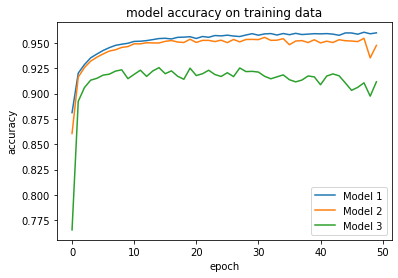

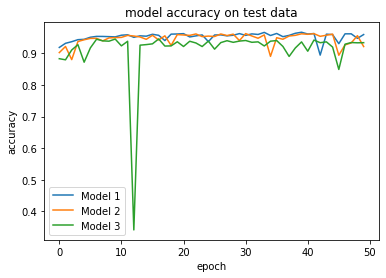

In [18]:
#Question 3 - plot
# plotting the metrics
fig = plt.figure()
# ----------------------- Plot your result here ---------------------
plt.plot(history.history['accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3_2.history['accuracy'])
plt.title('model accuracy on training data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='best')
plt.show()

plt.plot(history.history['val_accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history3_2.history['val_accuracy'])
plt.title('model accuracy on test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='best')
plt.show()
#Plot here
#--------------------------------------------------------------------

In [3]:
# Question 4

#Set-up strategy for multi-worker setup in question 4
strategy = tf.distribute.experimental.MultiWorkerMirroredStrategy()

#Set up of workers for distributed training
os.environ['TF_CONFIG'] = json.dumps({
    'cluster': {
        'worker': ["localhost:12345", "localhost:23456", "localhost:34567", "localhost:45678", "localhost:56789", "localhost:67890"]
    },
    'task': {'type': 'worker', 'index': 0}
})

#To set-up multiworker training the model must be created inside a strategy scope 
with strategy.scope():
    model_q4 = Sequential()
    model_q4.add(Dense(100, input_shape=(784,), kernel_regularizer=l2(0.01)))
    model_q4.add(Activation('relu'))    

    model_q4.add(Dense(10))
    model_q4.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) 
    model_q4.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)

#Training - Sharding is handled automatically by the strategy, data is split randomly in a disjoint basis by default
start = time.time()
history4 = model_q4.fit(X_train, Y_train,
          batch_size = 100,
          steps_per_epoch=10000/100,
          epochs= 50,
          verbose= 2,
          validation_data=(X_test, Y_test))  
end = time.time()

INFO:tensorflow:Single-worker CollectiveAllReduceStrategy with local_devices = ('/device:CPU:0',), communication = CollectiveCommunication.AUTO
INFO:tensorflow:Running Distribute Coordinator with mode = 'independent_worker', cluster_spec = {'worker': ['localhost:12345', 'localhost:23456', 'localhost:34567', 'localhost:45678', 'localhost:56789', 'localhost:67890']}, task_type = 'worker', task_id = 0, environment = None, rpc_layer = 'grpc'
INFO:tensorflow:Multi-worker CollectiveAllReduceStrategy with cluster_spec = {'worker': ['localhost:12345', 'localhost:23456', 'localhost:34567', 'localhost:45678', 'localhost:56789', 'localhost:67890']}, task_type = 'worker', task_id = 0, num_workers = 6, local_devices = ('/job:worker/task:0',), communication = CollectiveCommunication.AUTO
INFO:tensorflow:Starting standard TensorFlow server, target = 'grpc://localhost:12345', session_config= allow_soft_placement: true
graph_options {
  rewrite_options {
    scoped_allocator_optimization: ON
    scoped

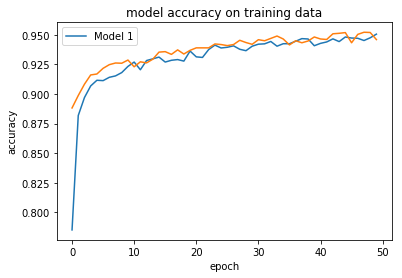

[0.8882, 0.8987, 0.9083, 0.9161, 0.9169, 0.9217, 0.9248, 0.9262, 0.926, 0.9287, 0.923, 0.9272, 0.9263, 0.9294, 0.9354, 0.9358, 0.9335, 0.9373, 0.9338, 0.9369, 0.939, 0.939, 0.939, 0.9423, 0.9418, 0.9409, 0.9418, 0.9454, 0.9435, 0.942, 0.9459, 0.945, 0.947, 0.949, 0.9465, 0.9415, 0.945, 0.9433, 0.9448, 0.9482, 0.9465, 0.9461, 0.9509, 0.9513, 0.9519, 0.9433, 0.9504, 0.9522, 0.952, 0.946]


In [5]:
#Question 4 - plot
# plotting the metrics
fig = plt.figure()
# ----------------------- Plot your result here ---------------------
plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('model accuracy on training data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Model 1'], loc='best')
plt.show()

#Plot here
#--------------------------------------------------------------------

print(history4.history['val_accuracy'])

In [8]:
## Question 5
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) 
    
    model = Sequential()
    model.add(Dense(100, input_shape=(784,), kernel_regularizer=l1(0.001)))
    model.add(Activation('relu'))    

    model.add(Dense(10))
    model.add(Activation('softmax'))

    model_q5 = clone_model(model)
    model_q5.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    ## Saving metrics in history

    # Complete the history: 
    history_lasso = model_q5.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()



print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 2.0844 - accuracy: 0.8737 - val_loss: 0.8551 - val_accuracy: 0.9082
Epoch 2/50
60000/60000 - 1s - loss: 0.6568 - accuracy: 0.9049 - val_loss: 0.5725 - val_accuracy: 0.9044
Epoch 3/50
60000/60000 - 1s - loss: 0.5470 - accuracy: 0.9099 - val_loss: 0.5041 - val_accuracy: 0.9160
Epoch 4/50
60000/60000 - 1s - loss: 0.5016 - accuracy: 0.9189 - val_loss: 0.4668 - val_accuracy: 0.9212
Epoch 5/50
60000/60000 - 1s - loss: 0.4695 - accuracy: 0.9231 - val_loss: 0.4730 - val_accuracy: 0.9186
Epoch 6/50
60000/60000 - 1s - loss: 0.4465 - accuracy: 0.9273 - val_loss: 0.4282 - val_accuracy: 0.9323
Epoch 7/50
60000/60000 - 1s - loss: 0.4304 - accuracy: 0.9304 - val_loss: 0.4155 - val_accuracy: 0.9332
Epoch 8/50
60000/60000 - 1s - loss: 0.4177 - accuracy: 0.9330 - val_loss: 0.3989 - val_accuracy: 0.9381
Epoch 9/50
60000/60000 - 1s - loss: 0.4059 - accuracy: 0.9353 - val_loss: 0.3861 - val_accuracy: 0.9398
Epoch 10/50
60

In [12]:
## Question 5 - Dropout
    
train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) 
    
    model = Sequential()
    model.add(Dense(100, input_shape=(784,)))
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    
    model.add(Dense(10))
    model.add(Activation('softmax'))

    model_q5_drop = clone_model(model)
    model_q5_drop.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    ## Saving metrics in history

    # Complete the history: 
    history_drop = model_q5_drop.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()



print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 0.4834 - accuracy: 0.8624 - val_loss: 0.2572 - val_accuracy: 0.9290
Epoch 2/50
60000/60000 - 1s - loss: 0.2692 - accuracy: 0.9226 - val_loss: 0.1990 - val_accuracy: 0.9427
Epoch 3/50
60000/60000 - 1s - loss: 0.2181 - accuracy: 0.9379 - val_loss: 0.1659 - val_accuracy: 0.9533
Epoch 4/50
60000/60000 - 1s - loss: 0.1860 - accuracy: 0.9453 - val_loss: 0.1440 - val_accuracy: 0.9582
Epoch 5/50
60000/60000 - 1s - loss: 0.1666 - accuracy: 0.9519 - val_loss: 0.1324 - val_accuracy: 0.9610
Epoch 6/50
60000/60000 - 1s - loss: 0.1504 - accuracy: 0.9558 - val_loss: 0.1208 - val_accuracy: 0.9646
Epoch 7/50
60000/60000 - 1s - loss: 0.1377 - accuracy: 0.9606 - val_loss: 0.1119 - val_accuracy: 0.9673
Epoch 8/50
60000/60000 - 1s - loss: 0.1286 - accuracy: 0.9628 - val_loss: 0.1043 - val_accuracy: 0.9690
Epoch 9/50
60000/60000 - 1s - loss: 0.1196 - accuracy: 0.9650 - val_loss: 0.0988 - val_accuracy: 0.9701
Epoch 10/50
60

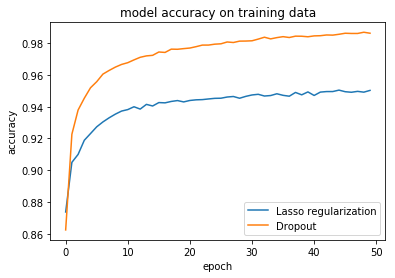

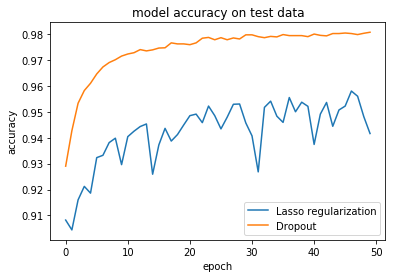

Average size of l1 weight = 0.0020460663
Average size of l1 weight = 0.058105156
Ratio: 0.035213165


In [22]:
#Question 5 - plot
# plotting the metrics
fig = plt.figure()
# ----------------------- Plot your result here ---------------------
plt.plot(history_lasso.history['accuracy'])
plt.plot(history_drop.history['accuracy'])
plt.title('model accuracy on training data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Lasso regularization', 'Dropout'], loc='best')
plt.show()

plt.plot(history_lasso.history['val_accuracy'])
plt.plot(history_drop.history['val_accuracy'])
plt.title('model accuracy on test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Lasso regularization', 'Dropout'], loc='best')
plt.show()
#Plot here
#--------------------------------------------------------------------

weights1 = model_q5.layers[0].get_weights()[0]
weights1_mean = np.mean(np.abs(weights1))
print("Average size of l1 weight = " + str(weights1_mean))
weights2 = model_q5_drop.layers[0].get_weights()[0]
weights2_mean = np.mean(np.abs(weights2))
print("Average size of l1 weight = " + str(weights2_mean))
print("Ratio: " + str(weights1_mean/weights2_mean))

In [7]:
## Question 6
    
# Building a linear stack of layers with the sequential model
model_q6 = Sequential()
model_q6.add(Dense(100, input_shape=(784,), kernel_regularizer=l2(0.01)))
model_q6.add(LayerNormalization(axis=1))
model_q6.add(Activation('relu'))    

model_q6.add(Dense(10))
model_q6.add(Activation('softmax'))

train = True
if(train == True):
    ##-------------------------- Compiling the sequential model ---------------------------------

    sgd = optimizers.SGD(lr=0.1 , decay= 0 , momentum= 0 , nesterov= False ) 
    model_q6 = clone_model(model_q6)
    model_q6.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=sgd)



    ##-------------------------- Training and saving the model ----------------------------------------------
    start = time.time()

    ## Saving metrics in history

    # Complete the history: 
    history_6 = model_q6.fit(X_train, Y_train,
              batch_size = 100,
              epochs= 50,
              verbose= 2,
              validation_data=(X_test, Y_test))  
    end = time.time()



print("Time elapsed: ", str(end-start), " s.")

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 2s - loss: 1.0306 - accuracy: 0.9057 - val_loss: 0.4194 - val_accuracy: 0.9428
Epoch 2/50
60000/60000 - 1s - loss: 0.3385 - accuracy: 0.9389 - val_loss: 0.3146 - val_accuracy: 0.9318
Epoch 3/50
60000/60000 - 1s - loss: 0.2726 - accuracy: 0.9450 - val_loss: 0.2311 - val_accuracy: 0.9578
Epoch 4/50
60000/60000 - 1s - loss: 0.2549 - accuracy: 0.9495 - val_loss: 0.2315 - val_accuracy: 0.9578
Epoch 5/50
60000/60000 - 1s - loss: 0.2513 - accuracy: 0.9501 - val_loss: 0.2211 - val_accuracy: 0.9615
Epoch 6/50
60000/60000 - 1s - loss: 0.2515 - accuracy: 0.9515 - val_loss: 0.2262 - val_accuracy: 0.9584
Epoch 7/50
60000/60000 - 2s - loss: 0.2493 - accuracy: 0.9513 - val_loss: 0.2516 - val_accuracy: 0.9505
Epoch 8/50
60000/60000 - 1s - loss: 0.2490 - accuracy: 0.9525 - val_loss: 0.3081 - val_accuracy: 0.9314
Epoch 9/50
60000/60000 - 1s - loss: 0.2604 - accuracy: 0.9503 - val_loss: 0.2392 - val_accuracy: 0.9562
Epoch 10/50
60

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


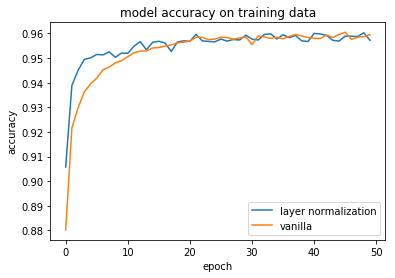

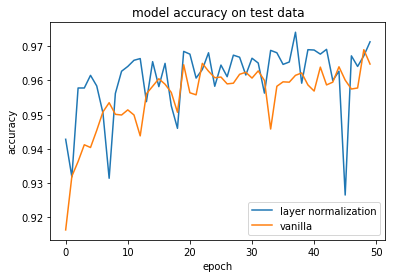

In [9]:
# Plot Question 6
# plotting the metrics
print(history.history.keys())

fig = plt.figure()

# ----------------------- Plot your result here ---------------------
plt.plot(history_6.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('model accuracy on training data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['layer normalization', 'vanilla'], loc='best')
plt.show()

plt.plot(history_6.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy on test data')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['layer normalization', 'vanilla'], loc='best')
plt.show()
#Plot here
#--------------------------------------------------------------------